# Supermarket Sales Analysis

In [1]:
# Importing necessary libraries.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [3]:
# Loading the dataset.
sales = pd.read_csv("D:\\SuperMarket Sales project files\\supermarket_sales.csv")

In [4]:
# Getting a preview of the dataset.
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# Retrieving basic statistics from the dataset.
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
# Getting further info on the dataset.
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
# To find null values.
null_val=sales.isnull().sum()
null_val

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Now that we've seen that the dataset doesn't contain any null values and is well structured
we move to the analysis part.

In [7]:
# Renaming cogs to revenue
sales.rename(columns={'cogs': 'revenue'}, inplace=True)

In [8]:
# Changing Date column from object to Datetime.
sales['Date'] = pd.to_datetime(sales['Date'])

## Data analysis and visualizations

### Demographic Analysis

<Axes: xlabel='City', ylabel='revenue'>

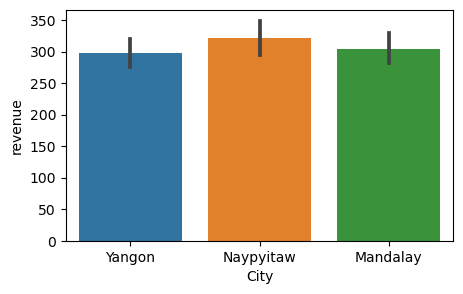

In [9]:
# To know about the city that generated the most revenue.
plt.figure(figsize=(5,3))
sb.barplot(x="City", y="revenue", data=sales)

In [10]:
# Gender and customer type analysis.
revenue_by_gender=sales.groupby('Gender')['revenue'].sum()
revenue_by_cust=sales.groupby('Customer type')['revenue'].sum()

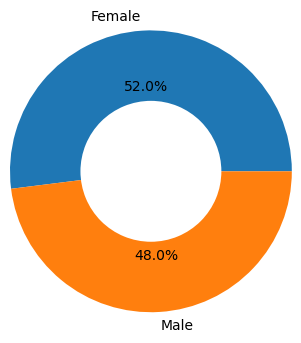

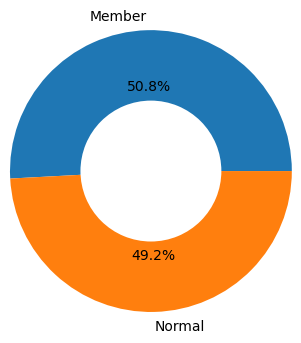

In [12]:
# Subplot 1
plt.figure(figsize=(5,3))
plt.subplot(1,2,1)
plt.pie(revenue_by_gender,labels=revenue_by_gender.index,autopct='%0.1f%%',radius=2)
plt.pie([1],colors=['w'],radius=1)
plt.show()
# Subplot 2
plt.figure(figsize=(5,3))
plt.subplot(1,2,2)
plt.pie(revenue_by_cust,labels=revenue_by_cust.index,autopct='%0.1f%%',radius=2)
plt.pie([1],colors=['w'],radius=1)
plt.show()

The distribution of total revenue is approximately evenly split between different categories:
    gender (male and female) and customer type (members and normal customers).

### Product Analysis

In [13]:
prod_line_revenue=sales.groupby('Product line')['revenue'].sum()

<Axes: xlabel='Product line'>

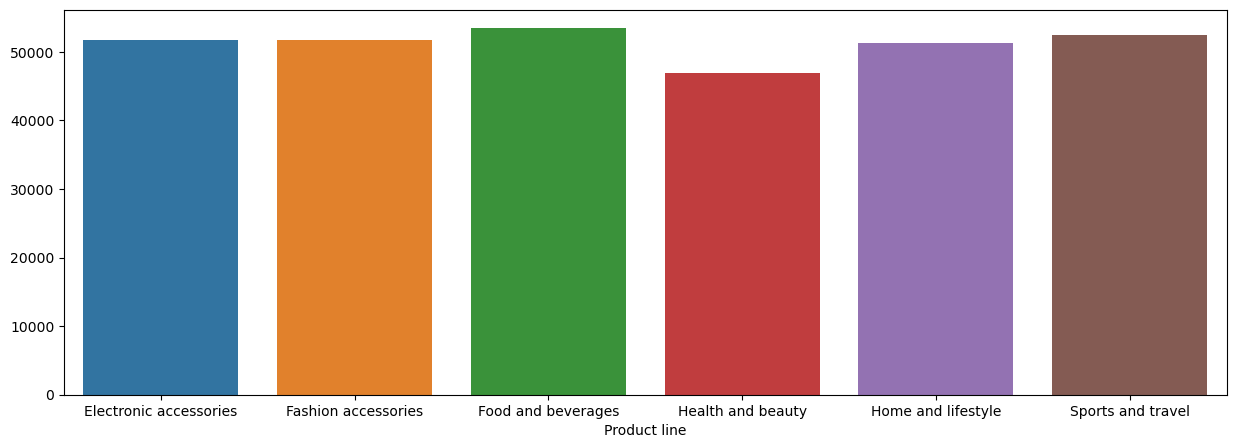

In [14]:
plt.figure(figsize=(15,5))
sb.barplot(x=prod_line_revenue.index, y=prod_line_revenue.values)

The food and beverages product line generated the most revenue.

In [15]:
quant=sales.groupby('Product line')['Quantity'].sum()
                 

<Axes: ylabel='Product line'>

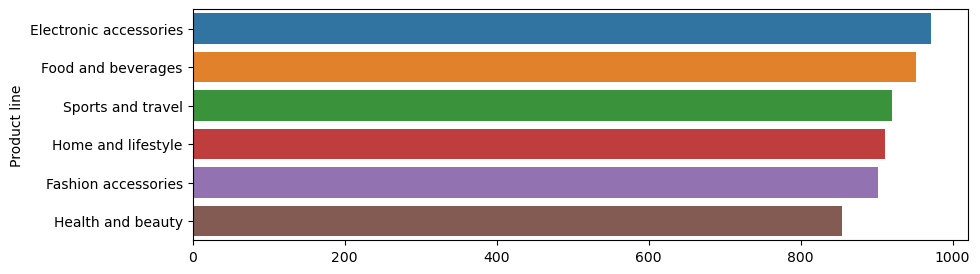

In [17]:
plt.figure(figsize=(10,3))
sb.barplot(x=quant.values, y=quant.index,
                 order=quant.sort_values(ascending=False).index)

In terms of quantity electronic accessories were sold the most.

###  Most profitable products

<Axes: xlabel='Product line', ylabel='gross income'>

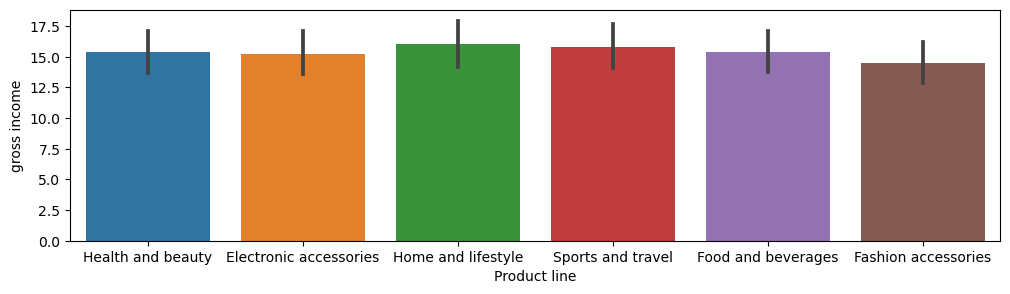

In [5]:
plt.figure(figsize=(12,3))
sb.barplot(x="Product line",y="gross income",data=sales)

Home and lifestyle products were the most profitable followed by sports and travel.

### Payment method Analysis

In [7]:
sales['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

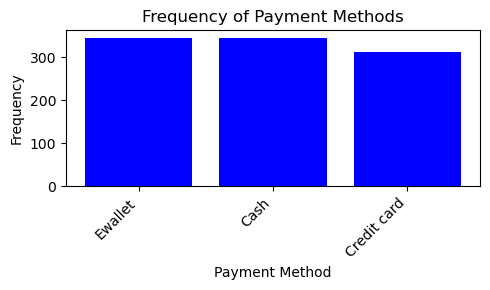

In [11]:
plt.figure(figsize=(5,3))
payment_counts = sales['Payment'].value_counts()
plt.bar(payment_counts.index, payment_counts.values, color="blue")
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Frequency of Payment Methods')


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Ratings Analysis

In [13]:
sales['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

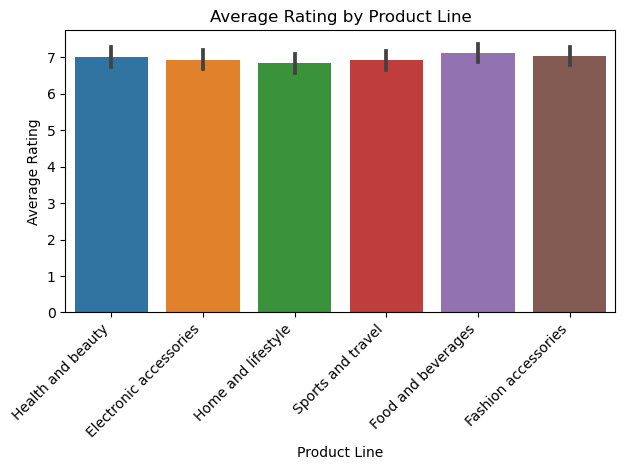

In [20]:
sb.barplot(x="Product line", y="Rating", data=sales)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
plt.title('Average Rating by Product Line')

plt.tight_layout()
plt.show()

This analysis provides a comprehensive understanding of the dataset and offers valuable insights that can inform business decisions and strategies.